#[Pima Indian Diabetes dataset](https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv)

***
##Team
###Samir Hassan - 2190041
###Gabriel Jeannot - 2185887
###Carlos Osorio - 2230894
###Luis Pareja - 2185833
###Diego Perea - 2185751


# Libraries and imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

from datetime import datetime
from sklearn import datasets, ensemble, model_selection

In [ ]:
#@title Import revelant modules and install Facets
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

from google.colab import widgets
# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Part 1: Dataset description

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within 5 years.

Fields description follow:

- preg = Number of times pregnant

- plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

- pres = Diastolic blood pressure (mm Hg)

- skin = Triceps skin fold thickness (mm)

- test = 2-Hour serum insulin (mu U/ml)

- mass = Body mass index (weight in kg/(height in m)^2)

- pedi = Diabetes pedigree function

- age = Age (years)

- class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

768 rows × 9 columns

In [ ]:
diabetes_file = pd.read_csv("/content/drive/MyDrive/Sesgos IA/Datasets/indians-diabetes.csv", low_memory=False)

diabetes_file

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
       'diabetes'],
      dtype='object')

In [ ]:
diabetes_file.describe().T


,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.8,3.4,0.0,1.0,3.0,6.0,17.0
plas,768.0,120.9,32.0,0.0,99.0,117.0,140.2,199.0
pres,768.0,69.1,19.4,0.0,62.0,72.0,80.0,122.0
skin,768.0,20.5,16.0,0.0,0.0,23.0,32.0,99.0
test,768.0,79.8,115.2,0.0,0.0,30.5,127.2,846.0
mass,768.0,32.0,7.9,0.0,27.3,32.0,36.6,67.1
pedi,768.0,0.5,0.3,0.1,0.2,0.4,0.6,2.4
age,768.0,33.2,11.8,21.0,24.0,29.0,41.0,81.0
diabetes,768.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0


In [ ]:

#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': diabetes_file, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
diabetes_file.isnull().values.any()

False

### FairAware Task #1

Review the descriptive statistics and histograms for each numerical and continuous feature. Click the **Show Raw Data** button above the histograms for categorical features to see the distribution of values per category.

Then, try to answer the following questions from earlier:

1. Are there missing feature values for a large number of observations?
- There are no missing values.
2. Are there features that are missing that might affect other features?
- There are no missing features that might affect others.
3. Are there any unexpected feature values?
- Analyzing the data, there are no unexpected feature values.
4. What signs of data skew do you see?
- The dataset is focused mostly in young women. There is no male information in this dataset, but this could be managed on purpose. Thus, we believe it's not a problem if the dataset is only focused in women.

In [ ]:
#@title Visualize dataset in Facets Dive

SAMPLE_SIZE = 5000 #@param
  
train_dive = diabetes_file.sample(SAMPLE_SIZE ,replace=True).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

## FairAware Task #2

* 1. **What's missing?**

More data would be needed in the age parameter in older people to avoid biases due to the fact that most women in the dataset are young, and it could have less accurracy in elder people.
* 2. **What's being overgeneralized?**

Age (21-29)
* 3. **What's being underrepresented?**

Age (30-81
* 4. **How do the variables, and their values, reflect the real world?**

All the variables present reflect accurate information that can be key in determining diabetes, for example, the thickness of the skinfold. This allows for a realistic reflection of what a person with diabetes may experience.
* 5. **What might we be leaving out?**

While the dataset contains informative variables that can help determine the risk of diabetes in the population, there may be other important factors, such as lifestyle choices and genetic factors, that are not captured in the dataset. Therefore, it's important to consider that the dataset may not provide a complete picture of all the factors that contribute to diabetes risk.

In [ ]:
# Define the target
target = diabetes_file["diabetes"]
target_names = ["positive", "negative"]

del diabetes_file["diabetes"]
diabetes_file

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.6,50
1,1,85,66,29,0,26.6,0.4,31
2,8,183,64,0,0,23.3,0.7,32
3,1,89,66,23,94,28.1,0.2,21
4,0,137,40,35,168,43.1,2.3,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.2,63
764,2,122,70,27,0,36.8,0.3,27
765,5,121,72,23,112,26.2,0.2,30
766,1,126,60,0,0,30.1,0.3,47


In [ ]:
# find correlations between different trends
corr = diabetes_file.corr()
corr.style.background_gradient(cmap='coolwarm')

,preg,plas,pres,skin,test,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


##Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_file, target, random_state = 42) 

# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

Test Acc: 0.729
              precision    recall  f1-score   support

    positive       0.79      0.78      0.79       123
    negative       0.62      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



### FairAware Task #3

Use the form below to generate confusion matrices for the two gender subgroups: `Female` and `Male`. Compare the number of False Positives and False Negatives for each subgroup. Are there any significant disparities in error rates that suggest the model performs better for one subgroup than another?

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
cm

array([[96, 27],
       [25, 44]])

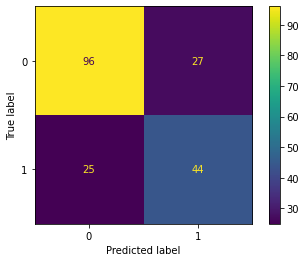

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

Top left quadrant = True Positives = Number of indians with diabetes labelled with diabetes

Bottom right quadrant = True Negatives = Number of indiands without diabetes labelled without diabetes

Top right quadrant = False Positives = Number indians with diabetes labelled without diabetes

Bottom left quadrant = False Negatives = Number indians without diabetes labelled with diabetes

In [ ]:
#@title Visualize Binary Confusion Matrix and Compute Evaluation Metrics Per Subgroup
CATEGORY  =  "age" #@param {type:"string"}
SUBGROUP =  "21" #@param {type:"string"}

# Labels for annotating axes in plot.
classes = ['No diabetes', 'Diabetes']

# Given define subgroup, generate predictions and obtain its corresponding 
# ground truth.
subgroup_filter  = diabetes_file.loc[diabetes_file[CATEGORY] == SUBGROUP]
features, labels = diabetes_file, diabetes_file.columns
# subgroup_results = model.evaluate(x=features, y=labels, verbose=0)
confusion_matrix = cm

subgroup_performance_metrics = {
    'ACCURACY': cm[5],
    'PRECISION': cm[6], 
    'RECALL': cm[7],
    'AUC': cm[8]
}
performance_df = pd.DataFrame(subgroup_performance_metrics, index=[SUBGROUP])
pd.options.display.float_format = '{:,.4f}'.format

plot_confusion_matrix(confusion_matrix, classes, SUBGROUP);
performance_df

IndexError: ignored